# DAIRY SALES SQL PROJECT

In [8]:
import os
import sqlite3
# List all SQLite database files in the current directory
db_files = [f for f in os.listdir() if f.endswith('.db')]
print("SQLite Database files in the current directory:")
for db_file in db_files:
    print(db_file)

# Create a connection to SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')
cursor = conn.cursor()
# Create a cursor object
cursor = conn.cursor()

# Query to get all table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results (table names)
tables = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in tables:
    print(table[0])


SQLite Database files in the current directory:
DAIRY_DATABASE.db
mydatabase.db
mydatabase1.db
Tables in the database:
COWFARM
DAIRYSALES


In [3]:
import os
import sqlite3
import time

# Path to the SQLite database file
db_path = 'DAIRY_DATABASE.db'

# Ensure all connections are closed
try:
    conn = sqlite3.connect(db_path)
    conn.close()  # Close the connection properly
except sqlite3.OperationalError:
    print("Database is already closed.")

# Give some time to ensure all processes are released
time.sleep(1)

# Now attempt to delete the database file
if os.path.exists(db_path):
    try:
        os.remove(db_path)
        print(f"Database '{db_path}' has been deleted.")
    except PermissionError as e:
        print(f"Permission error: {e}")
else:
    print(f"Database '{db_path}' does not exist.")


Database 'DAIRY_DATABASE.db' has been deleted.


In [6]:
import sqlite3
import pandas as pd
import numpy as np

# Create a connection to SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')
cursor = conn.cursor()

# Create the COWFARM table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS COWFARM (
    Transaction_ID varchar(500),
    Location VARCHAR(500),
    Total_Land_Area VARCHAR(500),
    Number_of_Cows INTEGER,
    Farm_Size VARCHAR(500),
    Storage_Condition VARCHAR(500),
    Production_Date varchar(500),
    Shelf_Days INTEGER,
    Quantity_litres REAL,
    Price_per_Unit REAL,
    Total_Value REAL,
    Quantity_in_Stock_litres REAL
);
''')

# Create the DAIRYSALES table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS DAIRYSALES (
    Transaction_ID VARCHAR(500),
    Sales_Date varchar(500),
    Product_ID INTEGER,
    Product_Name VARCHAR(500),
    Brand VARCHAR(500),
    Expiration_Date varchar(500),
    Quantity_Sold_liters REAL,
    Sold_Unit_Rate REAL,
    Total_Revenue REAL,
    Customer_Location VARCHAR(500),
    Sales_Channel VARCHAR(500)
);
''')

# --------- Importing data into COWFARM table ---------
# Load CSV data into a pandas DataFrame (without headers)
cowfarm_df = pd.read_csv("G:/IVY/data/MACHINE_LEARNING/COWFARM_DATASET.csv", header=None)

# Assign column names to match the COWFARM table structure
cowfarm_df.columns = [
    'Transaction_ID', 'Location', 'Total_Land_Area', 'Number_of_Cows',
    'Farm_Size', 'Storage_Condition', 'Production_Date', 'Shelf_Days',
    'Quantity_litres', 'Price_per_Unit', 'Total_Value', 'Quantity_in_Stock_litres'
]

# Convert appropriate columns to numeric types
cowfarm_df['Number_of_Cows'] = pd.to_numeric(cowfarm_df['Number_of_Cows'], errors='coerce')
cowfarm_df['Shelf_Days'] = pd.to_numeric(cowfarm_df['Shelf_Days'], errors='coerce')
cowfarm_df['Quantity_litres'] = pd.to_numeric(cowfarm_df['Quantity_litres'], errors='coerce')
cowfarm_df['Price_per_Unit'] = pd.to_numeric(cowfarm_df['Price_per_Unit'], errors='coerce')
cowfarm_df['Total_Value'] = pd.to_numeric(cowfarm_df['Total_Value'], errors='coerce')
cowfarm_df['Quantity_in_Stock_litres'] = pd.to_numeric(cowfarm_df['Quantity_in_Stock_litres'], errors='coerce')

# Insert data into the COWFARM table using executemany() for batch insertion
insert_query = '''
INSERT INTO COWFARM (
    Transaction_ID, Location, Total_Land_Area, Number_of_Cows, 
    Farm_Size, Storage_Condition, Production_Date, Shelf_Days, 
    Quantity_litres, Price_per_Unit, Total_Value, Quantity_in_Stock_litres
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
'''

# Convert the DataFrame to a list of tuples for insertion
cowfarm_data = cowfarm_df.values.tolist()

# Execute batch insert
cursor.executemany(insert_query, cowfarm_data)

# --------- Importing data into DAIRYSALES table ---------
# Load CSV data into a pandas DataFrame (without headers)
dairysales_df = pd.read_csv("G:/IVY/data/MACHINE_LEARNING/DAIRYSALES_DATASET.csv", header=None)

# Assign column names to match the DAIRYSALES table structure
dairysales_df.columns = [
    'Transaction_ID', 'Sales_Date', 'Product_ID', 'Product_Name', 'Brand',
    'Expiration_Date', 'Quantity_Sold_liters', 'Sold_Unit_Rate', 'Total_Revenue',
    'Customer_Location', 'Sales_Channel'
]

# Convert appropriate columns to numeric types
dairysales_df['Quantity_Sold_liters'] = pd.to_numeric(dairysales_df['Quantity_Sold_liters'], errors='coerce')
dairysales_df['Sold_Unit_Rate'] = pd.to_numeric(dairysales_df['Sold_Unit_Rate'], errors='coerce')
dairysales_df['Total_Revenue'] = pd.to_numeric(dairysales_df['Total_Revenue'], errors='coerce')

# Insert data into the DAIRYSALES table using executemany() for batch insertion
insert_query = '''
INSERT INTO DAIRYSALES (
    Transaction_ID, Sales_Date, Product_ID, Product_Name, Brand, Expiration_Date,
    Quantity_Sold_liters, Sold_Unit_Rate, Total_Revenue, Customer_Location, Sales_Channel
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
'''

# Convert the DataFrame to a list of tuples for insertion
dairysales_data = dairysales_df.values.tolist()

# Execute batch insert
cursor.executemany(insert_query, dairysales_data)

print("Data imported successfully into both COWFARM and DAIRYSALES tables!")

# Query to get all table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results (table names)
tables = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in tables:
    print(table[0])

# Commit the changes to save them in the database
conn.commit()
print("Changes saved successfully.")

# Close the connection
conn.close()
print("Database connection closed.")


Data imported successfully into both COWFARM and DAIRYSALES tables!
Tables in the database:
COWFARM
DAIRYSALES
Changes saved successfully.
Database connection closed.


In [9]:
import sqlite3
from tabulate import tabulate

# Function to execute a query and print the result in tabular form
def print_table_from_query(cursor, query):
    # Execute the query
    cursor.execute(query)
    
    # Fetch all rows
    rows = cursor.fetchall()
    
    # Fetch column names
    columns = [description[0] for description in cursor.description]
    
    # Print in table format using tabulate
    print(tabulate(rows, headers=columns, tablefmt="grid"))

# Create a connection to SQLite database
with sqlite3.connect('DAIRY_DATABASE.db') as conn:
    cursor = conn.cursor()
    
    # Fetch and print data from DAIRYSALES table
    print("\nDAIRYSALES Table Data:")
    print_table_from_query(cursor, 'SELECT * FROM DAIRYSALES')
    
    # Commit the changes (not necessary here since no changes were made)
    conn.commit()
    print("\nChanges saved successfully.")  # Optional as no changes were made

# Connection will be automatically closed when the `with` block ends
print("Database connection closed.")



DAIRYSALES Table Data:
+------------------+--------------+--------------+----------------+----------------------+-------------------+------------------------+------------------+-----------------+---------------------+-----------------+
| Transaction_ID   | Sales_Date   |   Product_ID | Product_Name   | Brand                | Expiration_Date   |   Quantity_Sold_liters |   Sold_Unit_Rate |   Total_Revenue | Customer_Location   | Sales_Channel   |
+==================+==============+==============+================+======================+===================+========================+==================+=================+=====================+=================+
| D0001            | 17-02-2022   |            5 | Ice Cream      | Dodla Dairy          | 21-01-2022        |                      7 |            82.24 |          575.68 | Madhya Pradesh      | Wholesale       |
+------------------+--------------+--------------+----------------+----------------------+-------------------+--------------

In [10]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Function to check if a column exists in a table
def column_exists(cursor, table_name, column_name):
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    return any(column[1] == column_name for column in columns)

# Connect to SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')
cursor = conn.cursor()

# Check if 'updated_Production_Date' column exists in COWFARM table
if not column_exists(cursor, 'COWFARM', 'updated_Production_Date'):
    # If the column doesn't exist, add it
    cursor.execute('''
        ALTER TABLE COWFARM ADD COLUMN updated_Production_Date DATE;
    ''')

# Update the 'updated_Production_Date' column with a formatted date from 'Production_Date'

cursor.execute('''
    UPDATE COWFARM
    SET updated_Production_Date = STRFTIME('%Y-%m-%d', 
        substr(Production_Date, 7, 4) || '-' || substr(Production_Date, 4, 2) || '-' || substr(Production_Date, 1, 2))
    WHERE Production_Date IS NOT NULL;
''')

# Commit the changes
conn.commit()

# Close the connection
conn.close()

print("Updated the Production_Date to updated_Production_Date successfully!")


# Connect to SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')

# Query to select all data from COWFARM table
query = "SELECT * FROM COWFARM"

# Load the result into a pandas DataFrame
cowfarm_dataframe = pd.read_sql_query(query, conn)

# Print the result in a tabular format using tabulate
print(tabulate(cowfarm_dataframe, headers='keys', tablefmt='pretty'))

# Close the connection
conn.close()

print("Database connection closed.")


Updated the Production_Date to updated_Production_Date successfully!
+------+----------------+----------------+-----------------+----------------+-----------+-------------------+-----------------+------------+-----------------+----------------+-------------+--------------------------+-------------------------+
|      | Transaction_ID |    Location    | Total_Land_Area | Number_of_Cows | Farm_Size | Storage_Condition | Production_Date | Shelf_Days | Quantity_litres | Price_per_Unit | Total_Value | Quantity_in_Stock_litres | updated_Production_Date |
+------+----------------+----------------+-----------------+----------------+-----------+-------------------+-----------------+------------+-----------------+----------------+-------------+--------------------------+-------------------------+
|  0   |     D0001      |   Telangana    |     310.84      |       96       |  Medium   |      Frozen       |   27-12-2021    |     25     |      222.4      |     85.72      |  19064.128  |          215

In [28]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')
cursor = conn.cursor()

# Check if the column already exists in the table
cursor.execute("PRAGMA table_info(DAIRYSALES);")
columns = cursor.fetchall()

# Add the column only if it doesn't exist
if not any(column[1] == "updated_Sales_Date" for column in columns):
    cursor.execute('ALTER TABLE DAIRYSALES ADD COLUMN updated_Sales_Date DATE;')

# Check if 'updated_Sales_Date' column exists in DAIRYSALES table
if not column_exists(cursor, 'DAIRYSALES', 'updated_Sales_Date'):
    # If the column doesn't exist, add it
    cursor.execute('''
        ALTER TABLE DAIRYSALES ADD COLUMN updated_Sales_Date DATE;
    ''')

# Update the 'updated_Sales_Date' column with a formatted date from 'Sales_Date'

cursor.execute('''
    UPDATE DAIRYSALES
    SET updated_Sales_Date = STRFTIME('%Y-%m-%d', 
        substr(Sales_Date, 7, 4) || '-' || substr(Sales_Date, 4, 2) || '-' || substr(Sales_Date, 1, 2))
    WHERE Sales_Date IS NOT NULL;''')

# Commit the changes
conn.commit()
# Close the connection
conn.close()
print("Database updated successfully.")

# Connect to SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')

# Query to select all data from COWFARM table
query = "SELECT * FROM DAIRYSALES"

# Load the result into a pandas DataFrame
dairysales_dataframe = pd.read_sql_query(query, conn)

# Print the result in a tabular format using tabulate
print(tabulate(dairysales_dataframe, headers='keys', tablefmt='pretty'))

# Close the connection
conn.close()

print("Database connection closed.")


Database updated successfully.
+------+----------------+------------+------------+--------------+----------------------+-----------------+----------------------+----------------+---------------+-------------------+---------------+--------------------+
|      | Transaction_ID | Sales_Date | Product_ID | Product_Name |        Brand         | Expiration_Date | Quantity_Sold_liters | Sold_Unit_Rate | Total_Revenue | Customer_Location | Sales_Channel | updated_Sales_Date |
+------+----------------+------------+------------+--------------+----------------------+-----------------+----------------------+----------------+---------------+-------------------+---------------+--------------------+
|  0   |     D0001      | 17-02-2022 |     5      |  Ice Cream   |     Dodla Dairy      |   21-01-2022    |         7.0          |     82.24      |    575.68     |  Madhya Pradesh   |   Wholesale   |     2022-02-17     |
|  1   |     D0002      | 01-12-2021 |     1      |     Milk     |         Amul      

In [29]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Connect to SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')

# Create 1st view
conn.execute('''
CREATE VIEW IF NOT EXISTS Year_Product_Sales AS
SELECT
    strftime('%Y', updated_Sales_Date) AS Year_Sales,
    Product_Name,
    ROUND(SUM(Total_Revenue)) AS Sales
FROM DAIRYSALES
GROUP BY Year_Sales, Product_Name
ORDER BY Year_Sales, Sales DESC;
''')
# Create 2nd view
conn.execute('''
CREATE VIEW IF NOT EXISTS Year_Brand_Sales AS
SELECT
    strftime('%Y', updated_Sales_Date) AS Year_Sales, 
    Brand,
    ROUND(SUM(Total_Revenue)) AS Sales
FROM DAIRYSALES
GROUP BY Year_Sales, Brand
ORDER BY Year_Sales, Sales DESC;
''')
# Create 3rd view
conn.execute('''
CREATE VIEW IF NOT EXISTS SalesChannel_State_Sales AS
SELECT 
    Sales_Channel, 
    Customer_Location, 
    ROUND(SUM(Total_Revenue)) AS Sales
FROM DAIRYSALES
GROUP BY Sales_Channel, Customer_Location
ORDER BY Sales_Channel ASC, Customer_Location ASC;
''')
# Create 4th view
conn.execute('''
CREATE VIEW IF NOT EXISTS Product_State_Sales AS
SELECT 
    Product_Name, 
    Customer_Location, 
    ROUND(SUM(Total_Revenue)) AS Sales
FROM DAIRYSALES
GROUP BY Product_Name, Customer_Location
ORDER BY Product_Name ASC, Customer_Location ASC;
''')
# Create 5th view
conn.execute('''
CREATE VIEW IF NOT EXISTS Year_State_Sales AS
SELECT 
    strftime('%Y', updated_Sales_Date) AS Year_Sales, 
    Customer_Location, 
    ROUND(SUM(Total_Revenue)) AS Sales
FROM DAIRYSALES
GROUP BY Year_Sales, Customer_Location
ORDER BY Year_Sales ASC, Sales DESC;
''')
# Create 7th view
conn.execute('''
CREATE VIEW IF NOT EXISTS Brand_Product_Sales AS
SELECT 
    Brand, 
    Product_Name, 
    ROUND(SUM(Total_Revenue)) AS Sales
FROM DAIRYSALES
GROUP BY Brand, Product_Name
ORDER BY Sales DESC;
''')

# Create DAIRYTABLE
# Check if the table exists
cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='DAIRYTABLE';")
table_exists = cursor.fetchone()

if not table_exists:
    # Table doesn't exist, so create it
    conn.execute('''
    CREATE TABLE DAIRYTABLE AS
    SELECT 
        S.Product_Name, 
        S.Brand, 
        C.Quantity_in_Stock_litres, 
        C.Total_Value, 
        S.Quantity_Sold_liters, 
        S.Total_Revenue,
        S.updated_Sales_Date AS Year_Sales, 
        S.Sales_Channel, 
        S.Customer_Location
    FROM cowfarm AS C
    INNER JOIN dairysales AS S USING (Transaction_ID);
    ''')

    # Commit the changes
    conn.commit()
else:
    print("DAIRYTABLE already exists.")

# Close the connection
conn.close()
print("Database connection closed.")


DAIRYTABLE already exists.
Database connection closed.


In [30]:
import sqlite3
import pandas as pd
from tabulate import tabulate

# Create a connection to SQLite database (replace 'DAIRY_DATABASE.db' with your actual database path)
conn = sqlite3.connect('DAIRY_DATABASE.db')

# Define multiple SQL queries with proper separation by commas
multi_queries_DAIRY = [
'''SELECT * FROM Year_Product_Sales;''', #20th Query
'''SELECT * FROM Year_Brand_Sales;''', #21th Query
'''SELECT * FROM SalesChannel_State_Sales;''', #22nd Query
'''SELECT * FROM Product_State_Sales;''', #23rd Query
'''SELECT * FROM Year_State_Sales;''', #24th Query
'''SELECT * FROM Brand_Product_Sales''',#25th Query
'''SELECT 
    Product_Name,
    (100 * (ROUND(SUM(Total_Revenue)) / ROUND(SUM(Total_Value)))) AS Sales_Percent
FROM DAIRYTABLE
GROUP BY Product_Name
ORDER BY Sales_Percent DESC;
''', #26th Query
'''SELECT Brand,
    (100 * (ROUND(SUM(Total_Revenue)) / ROUND(SUM(Total_Value)))) AS Sales_Percent
FROM DAIRYTABLE
GROUP BY Brand
ORDER BY Sales_Percent DESC;''',#27th Query
'''SELECT 
    strftime('%Y', Year_Sales) AS Year_,
    (100 * (ROUND(SUM(Total_Revenue)) / ROUND(SUM(Total_Value)))) AS Sales_Percent
FROM DAIRYTABLE
GROUP BY Year_
ORDER BY Sales_Percent DESC;''', #28th Query
'''WITH T1 AS (
    SELECT 
        Customer_Location, 
        Product_Name, 
        Sales, 
        RANK() OVER (PARTITION BY Customer_Location ORDER BY Sales DESC) AS RNK
    FROM product_state_sales
)
SELECT * FROM T1 WHERE RNK = 1''',#29th Query
'''WITH B2 AS (
    SELECT 
        d.Product_Name, 
        c.Quantity_litres, 
        d.Quantity_Sold_liters
    FROM cowfarm c 
    INNER JOIN dairysales d 
    USING(Transaction_ID)
)
SELECT 
    Product_Name, 
    SUM(Quantity_Sold_liters) AS Sales_Quantity, 
    ROUND(SUM(Quantity_litres)) AS TotalQuantity
FROM B2 
GROUP BY Product_Name;''', #30th Query
'''WITH B1 AS (
    SELECT 
        d.Brand, 
        c.Quantity_litres, 
        d.Quantity_Sold_liters
    FROM cowfarm c 
    INNER JOIN dairysales d 
    USING(Transaction_ID)
)
SELECT 
    Brand, 
    SUM(Quantity_Sold_liters) AS Sales_Quantity, 
    ROUND(SUM(Quantity_litres)) AS TotalQuantity
FROM B1 
GROUP BY Brand;''', #32nd Query
'''WITH A AS (SELECT S.Brand , C.Total_Land_Area FROM COWFARM C INNER JOIN DAIRYSALES S USING (Transaction_ID))
    SELECT Brand, ROUND(SUM(Total_Land_Area)) AS Land FROM A GROUP BY Brand ORDER BY Land DESC''',  # First Query
'''WITH C AS (SELECT S.Brand, C.Farm_Size FROM COWFARM C INNER JOIN DAIRYSALES S USING (Transaction_ID))
    SELECT Brand, COUNT(Farm_Size) AS Total_Farm FROM C GROUP BY Brand ORDER BY Total_Farm DESC''',  # Second Query
'''WITH B AS (SELECT S.Brand, C.Number_of_Cows FROM COWFARM C INNER JOIN DAIRYSALES S USING (Transaction_ID))
    SELECT Brand, ROUND(SUM(Number_of_Cows)) AS COWS FROM B GROUP BY Brand ORDER BY COWS DESC''',  # Third Query
'''SELECT Location , SUM(Number_of_Cows) AS Cows FROM COWFARM GROUP BY Location ORDER BY Cows DESC''',  # Fourth Query
'''SELECT Location , ROUND(SUM(Total_Land_Area)) AS Farm_Area FROM COWFARM GROUP BY Location ORDER BY Farm_Area DESC''',  # Fifth Query
'''SELECT Storage_Condition , COUNT(Storage_Condition) AS Count FROM COWFARM GROUP BY Storage_Condition''',  # Sixth Query
'''WITH C2 AS (with C1 AS (select Brand ,Product_Name , round(avg(Sold_Unit_Rate)) as Unit_Rate from dairysales group by Brand , Product_Name)
    select Product_Name , Brand , Unit_Rate , dense_rank() over (Partition By Product_Name order by Unit_Rate ASC)AS RNK from C1)
    select * from C2 where RNK=1''', # 7TH Query 
'''select Location , round(sum(Quantity_litres)) as Total_Quanty from cowfarm group by Location order by Total_Quanty''', #8th query
'''select Customer_Location , round(sum(Total_Revenue)) as Sales from dairysales group by Customer_Location order by Sales''', # 9th Query
'''select Sales_Channel ,  round(sum(Total_Revenue)) as Sales from dairysales group by Sales_Channel order by Sales DESC''', #10th query
'''select Brand , round(sum(Total_Revenue)) as Sales from dairysales group by Brand order by Sales DESC''', # 11th Query
'''select Product_Name , round(sum(Total_Revenue)) as Sales from dairysales group by Product_Name order by Sales DESC''' , # 12th Query
'''select Product_Name , round(avg(Sold_Unit_Rate)) as AVG_Unit_Rate from  dairysales group by Product_Name order by AVG_Unit_Rate DESC''', #13th Query
'''
WITH L AS (
    SELECT Location, COUNT(Farm_Size) AS Large_Farm_Total
    FROM COWFARM
    WHERE Farm_Size = "Large"
    GROUP BY Location
    ORDER BY Large_Farm_Total DESC
),
M AS (
    SELECT Location, COUNT(Farm_Size) AS Mid_Farm_Total
    FROM COWFARM
    WHERE Farm_Size = "Medium"
    GROUP BY Location
    ORDER BY Mid_Farm_Total DESC
),
S AS (
    SELECT Location, COUNT(Farm_Size) AS Small_Farm_Total
    FROM COWFARM
    WHERE Farm_Size = "Small"
    GROUP BY Location
    ORDER BY Small_Farm_Total DESC
)
SELECT * FROM L; ''',  #14th Query

'''SELECT Location, 
       strftime('%Y', updated_Production_Date) AS ProductionYear, 
       ROUND(SUM(Quantity_litres)) AS Total_Quanty 
FROM COWFARM 
GROUP BY Location, ProductionYear 
ORDER BY Location ASC, ProductionYear ASC;''', # 15th query
'''SELECT strftime('%Y', updated_Production_Date) AS Production_YEAR, 
       ROUND(SUM(Quantity_litres)) AS Total_Quanty 
FROM COWFARM 
GROUP BY Production_YEAR 
ORDER BY Total_Quanty DESC;''', #16th Query
'''SELECT
    CASE strftime('%m', updated_Production_Date)
        WHEN '01' THEN 'January'
        WHEN '02' THEN 'February'
        WHEN '03' THEN 'March'
        WHEN '04' THEN 'April'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'June'
        WHEN '07' THEN 'July'
        WHEN '08' THEN 'August'
        WHEN '09' THEN 'September'
        WHEN '10' THEN 'October'
        WHEN '11' THEN 'November'
        WHEN '12' THEN 'December'
    END AS Production_Month,
    ROUND(AVG(Quantity_litres)) AS AVG_Quanty
FROM COWFARM
GROUP BY Production_Month
ORDER BY AVG_Quanty DESC;''', #17th Query
'''SELECT
    CASE strftime('%w', updated_Production_Date)
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS Production_Day,
    ROUND(AVG(Quantity_litres)) AS AVG_Quanty
FROM COWFARM
GROUP BY Production_Day
ORDER BY AVG_Quanty DESC;''', #18th Query
'''select Location , round(sum(Quantity_litres)) as Total_Quanty from cowfarm group by Location order by Total_Quanty''', # 19th query
]

# Loop through each query, run it, and print the result in tabular form
for i, query in enumerate(multi_queries_DAIRY, start=1):
    # Execute the query and load the result into a DataFrame
    multi_queries_DAIRY_result_dataframe = pd.read_sql_query(query, conn)
    
    # Get the column names from the DataFrame
    columns = multi_queries_DAIRY_result_dataframe.columns.tolist()
    
    # Print the result in tabular format using tabulate
    print(f"\nQuery {i} Result:")
    print(tabulate(multi_queries_DAIRY_result_dataframe, headers=columns, tablefmt="pretty"))

print("Convert all queries into dataframes")

# Create a list to store the DataFrames
multi_Q_DAIRY_dataframes = []

# Loop through each query, run it, and store the result in a DataFrame
for query in multi_queries_DAIRY:
    multi_queries_DAIRY_result_dataframe = pd.read_sql_query(query, conn)
    multi_Q_DAIRY_dataframes.append(multi_queries_DAIRY_result_dataframe)  # Store the DataFrame in the list

# Optionally, print the DataFrames if you need
#for i, df in enumerate(multi_Q_DAIRY_dataframes, start=1):
#   print(f"\nDataFrame {i}:\n", df)

# Commit the changes to save them in the database (if applicable)
conn.commit()
print("Changes saved successfully.")

# Close the connection
conn.close()
print("Database connection closed.")



Query 1 Result:
+----+------------+--------------+-----------+
|    | Year_Sales | Product_Name |   Sales   |
+----+------------+--------------+-----------+
| 0  |    2019    |    Butter    | 1883451.0 |
| 1  |    2019    |    Lassi     | 1751218.0 |
| 2  |    2019    |  Buttermilk  | 1635304.0 |
| 3  |    2019    |     Curd     | 1615245.0 |
| 4  |    2019    |     Milk     | 1535853.0 |
| 5  |    2019    |    Paneer    | 1531651.0 |
| 6  |    2019    |     Ghee     | 1455516.0 |
| 7  |    2019    |    Cheese    | 1452238.0 |
| 8  |    2019    |  Ice Cream   | 1252350.0 |
| 9  |    2019    |    Yogurt    | 1125491.0 |
| 10 |    2020    |     Curd     | 1914347.0 |
| 11 |    2020    |     Milk     | 1638592.0 |
| 12 |    2020    |    Yogurt    | 1618455.0 |
| 13 |    2020    |    Paneer    | 1575979.0 |
| 14 |    2020    |    Lassi     | 1510267.0 |
| 15 |    2020    |  Ice Cream   | 1423012.0 |
| 16 |    2020    |     Ghee     | 1356748.0 |
| 17 |    2020    |  Buttermilk  | 1320302.

In [31]:
import sqlite3
import pandas as pd

# Function to fetch top 3 brands for a given location
def statewise_brand(conn, select_location):
    query = '''
    SELECT Customer_Location, Brand, ROUND(SUM(Total_Revenue)) AS Sales
    FROM dairysales
    WHERE Customer_Location = ?
    GROUP BY Customer_Location, Brand
    ORDER BY Sales DESC
    LIMIT 3;
    '''
    # Execute the query with the location parameter
    df = pd.read_sql_query(query, conn, params=(select_location,))
    return df

# Function to fetch top 3 products for a given location
def statewise_product(conn, select_location):
    query = '''
    SELECT Customer_Location, Product_Name, ROUND(SUM(Total_Revenue)) AS Sales
    FROM dairysales
    WHERE Customer_Location = ?
    GROUP BY Customer_Location, Product_Name
    ORDER BY Sales DESC
    LIMIT 3;
    '''
    # Execute the query with the location parameter
    df = pd.read_sql_query(query, conn, params=(select_location,))
    return df

# Connect to the SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')

# Call the functions with specific locations
location_brand = "Delhi"
location_product = "West Bengal"

# Fetch and display top 3 brands for Delhi
print(f"Top 3 Brands in {location_brand}:")
brand_df = statewise_brand(conn, location_brand)
print(brand_df)

# Fetch and display top 3 products for West Bengal
print(f"\nTop 3 Products in {location_product}:")
product_df = statewise_product(conn, location_product)
print(product_df)

# Close the connection
conn.close()


Top 3 Brands in Delhi:
  Customer_Location         Brand      Sales
0             Delhi  Mother Dairy  1528610.0
1             Delhi          Amul  1509715.0
2             Delhi           Raj   963068.0

Top 3 Products in West Bengal:
  Customer_Location Product_Name     Sales
0       West Bengal       Cheese  493270.0
1       West Bengal   Buttermilk  490094.0
2       West Bengal         Curd  484126.0


In [32]:
# Create a connection to SQLite database (replace 'DAIRY_DATABASE.db' with your actual database path)
conn = sqlite3.connect('DAIRY_DATABASE.db')

# Loop through each query, run it, and store the result in a DataFrame
for i, query in enumerate(multi_queries_DAIRY, start=1):
    multi_Q_DAIRY_dataframes = pd.read_sql_query(query, conn)
    print(f"\nQuery {i} Result:")
    print(multi_Q_DAIRY_dataframes)
    print("\n" + "="*40)

# Commit the changes to save them in the database (if applicable)
conn.commit()
print("Changes saved successfully.")
# Close the connection
conn.close()
print("Database connection closed.")



Query 1 Result:
   Year_Sales Product_Name      Sales
0        2019       Butter  1883451.0
1        2019        Lassi  1751218.0
2        2019   Buttermilk  1635304.0
3        2019         Curd  1615245.0
4        2019         Milk  1535853.0
5        2019       Paneer  1531651.0
6        2019         Ghee  1455516.0
7        2019       Cheese  1452238.0
8        2019    Ice Cream  1252350.0
9        2019       Yogurt  1125491.0
10       2020         Curd  1914347.0
11       2020         Milk  1638592.0
12       2020       Yogurt  1618455.0
13       2020       Paneer  1575979.0
14       2020        Lassi  1510267.0
15       2020    Ice Cream  1423012.0
16       2020         Ghee  1356748.0
17       2020   Buttermilk  1320302.0
18       2020       Cheese  1264483.0
19       2020       Butter  1212204.0
20       2021       Yogurt  1762278.0
21       2021       Butter  1597312.0
22       2021         Curd  1486516.0
23       2021         Milk  1486268.0
24       2021   Buttermilk  14629

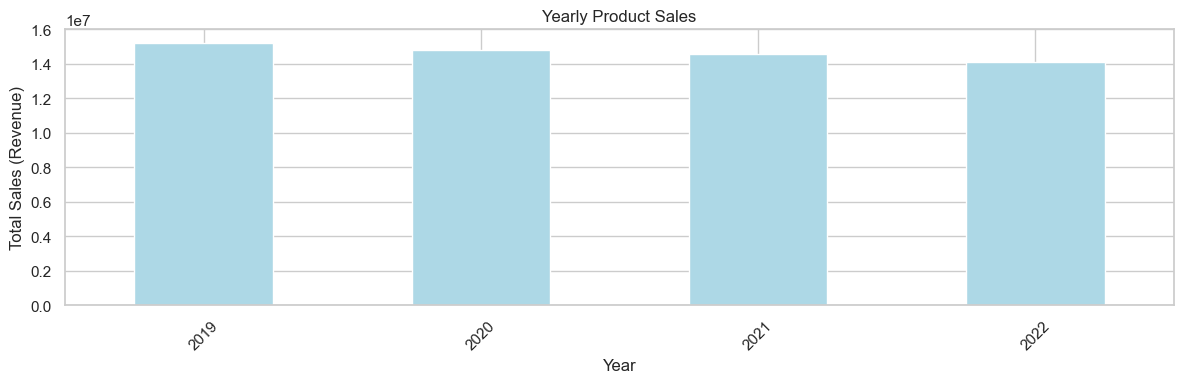

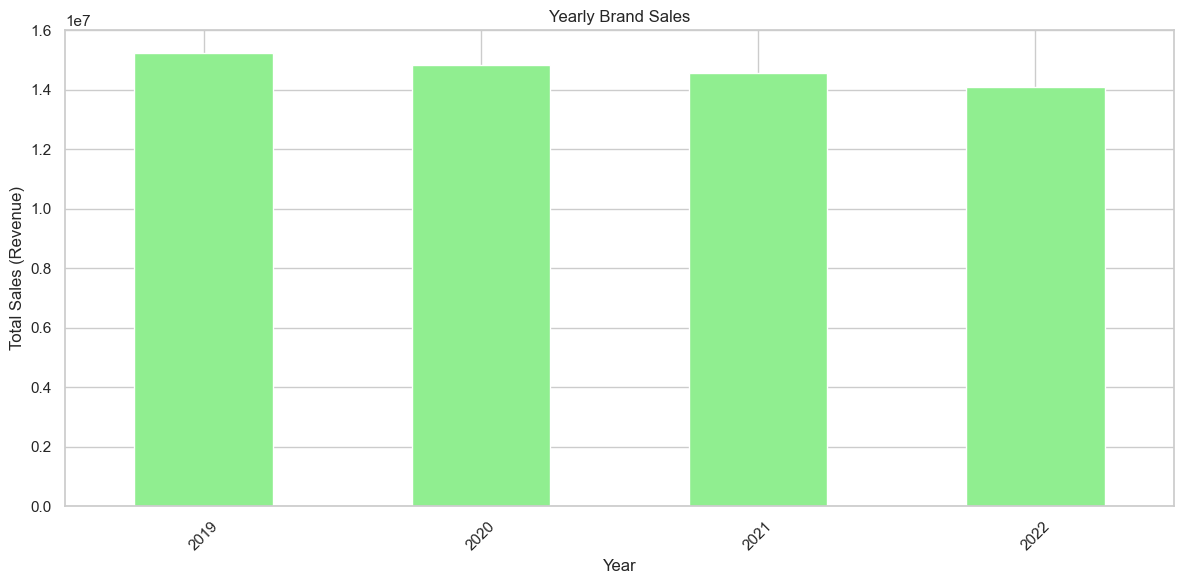

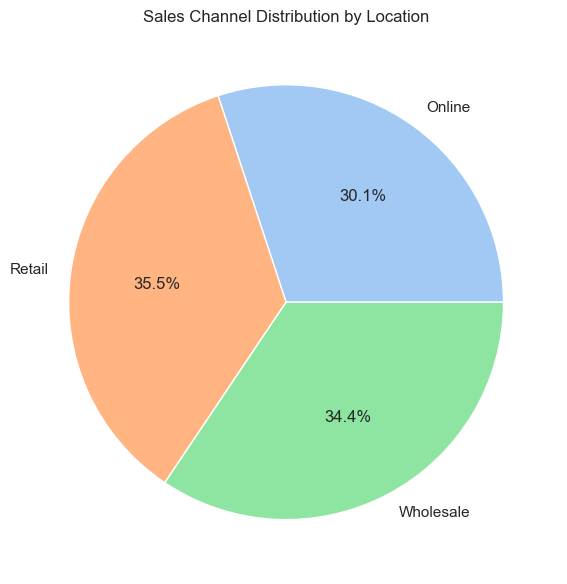

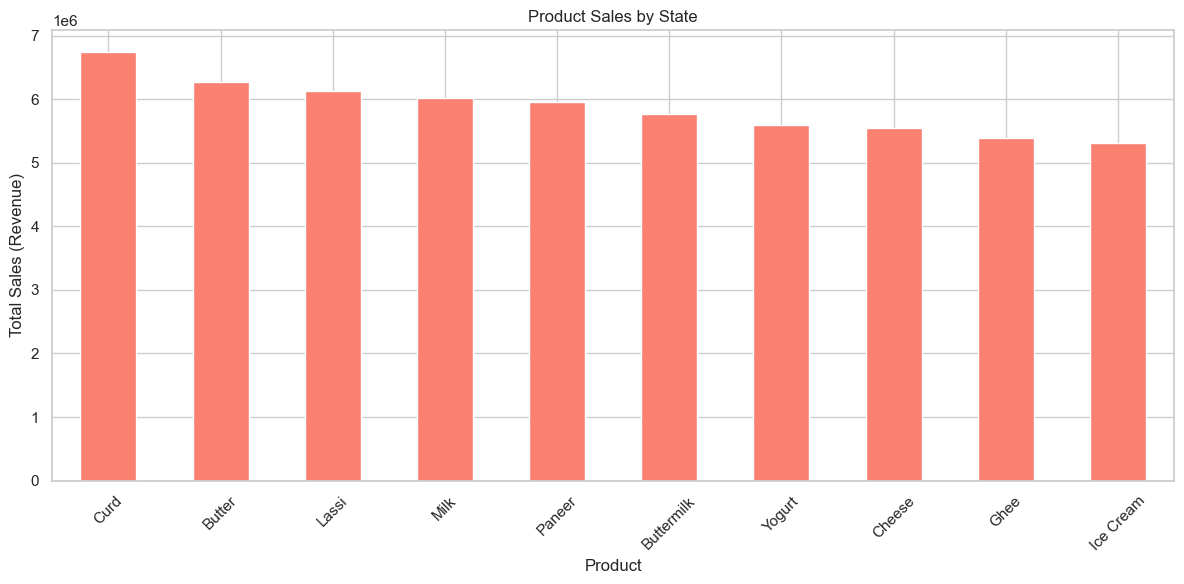

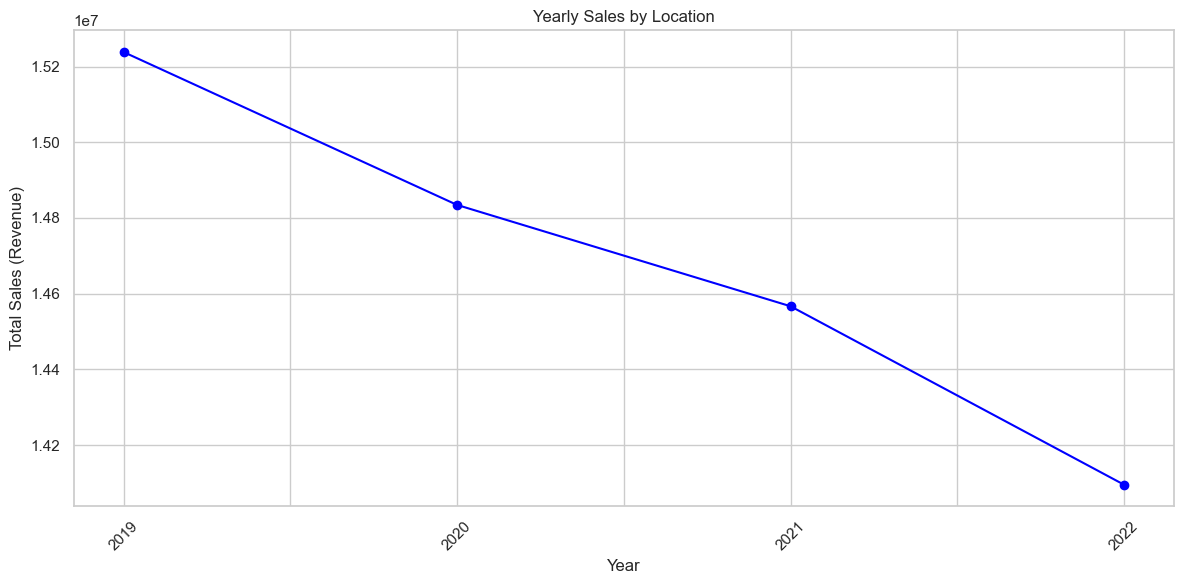

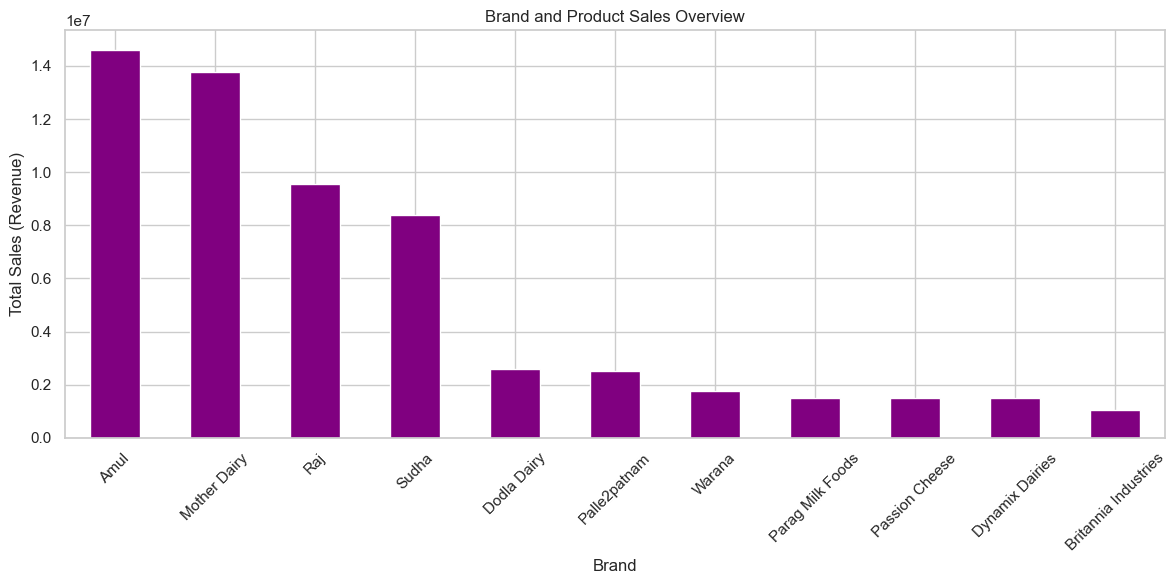

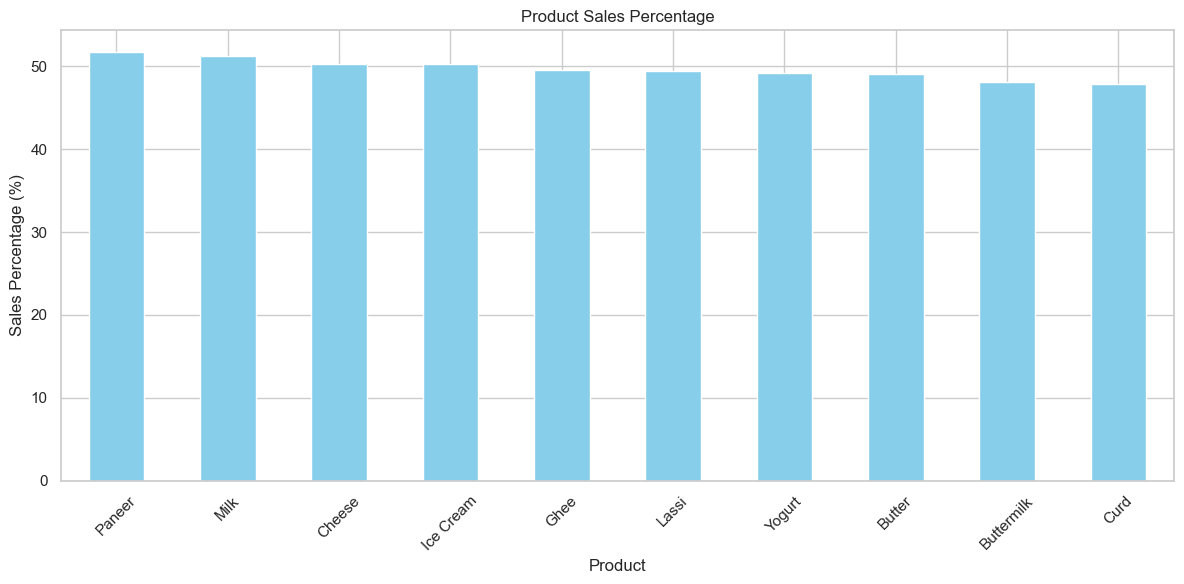

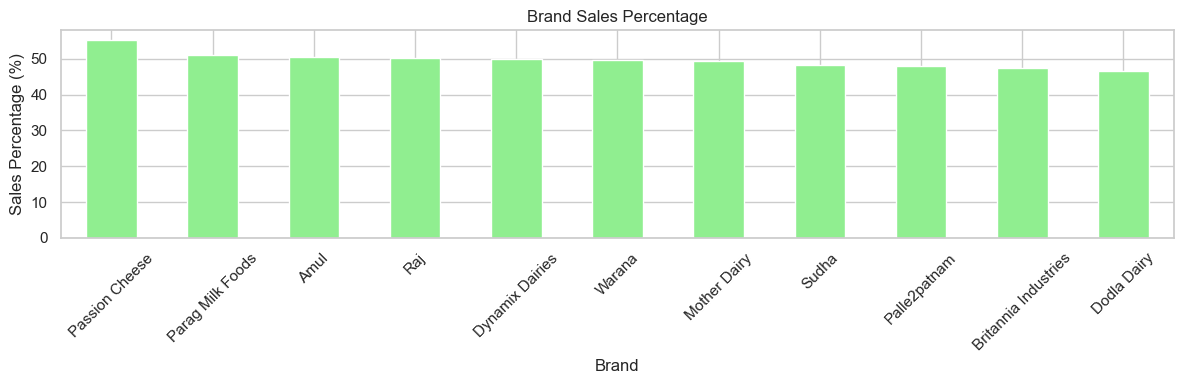

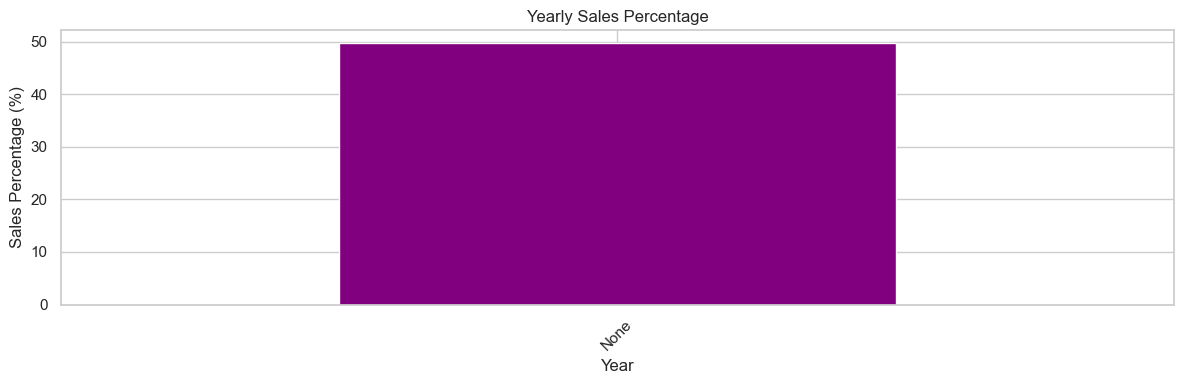

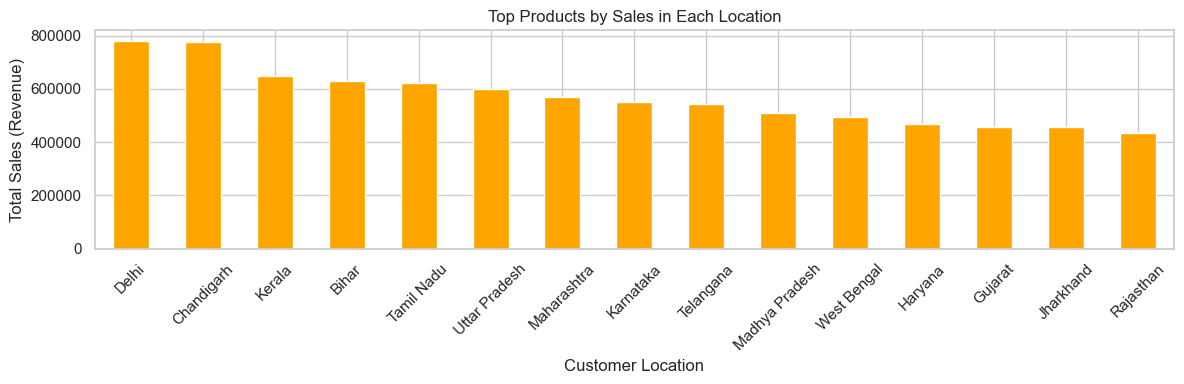

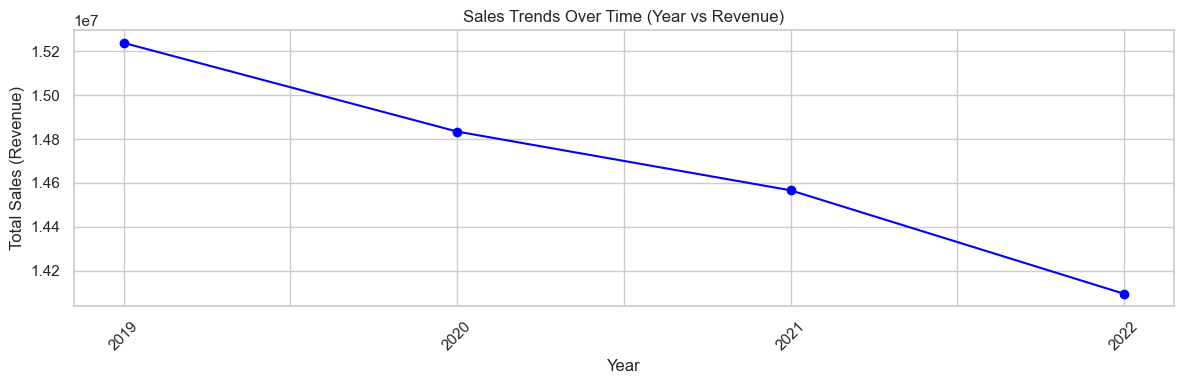

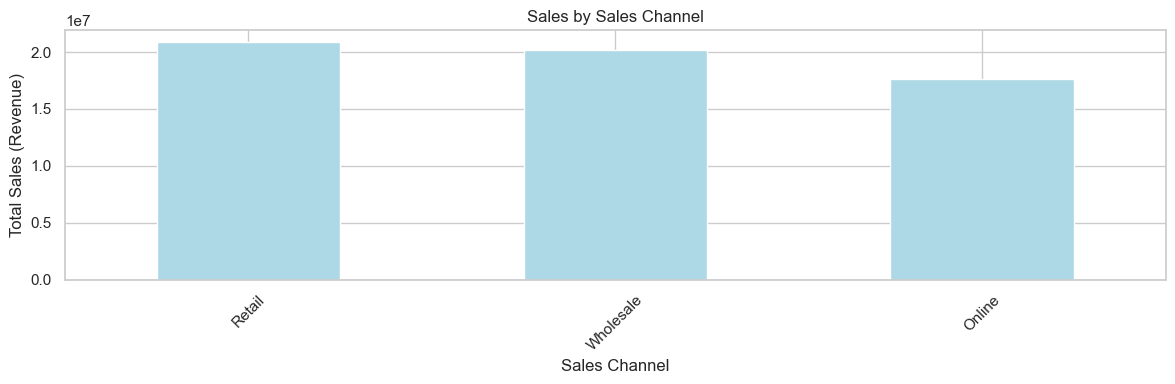

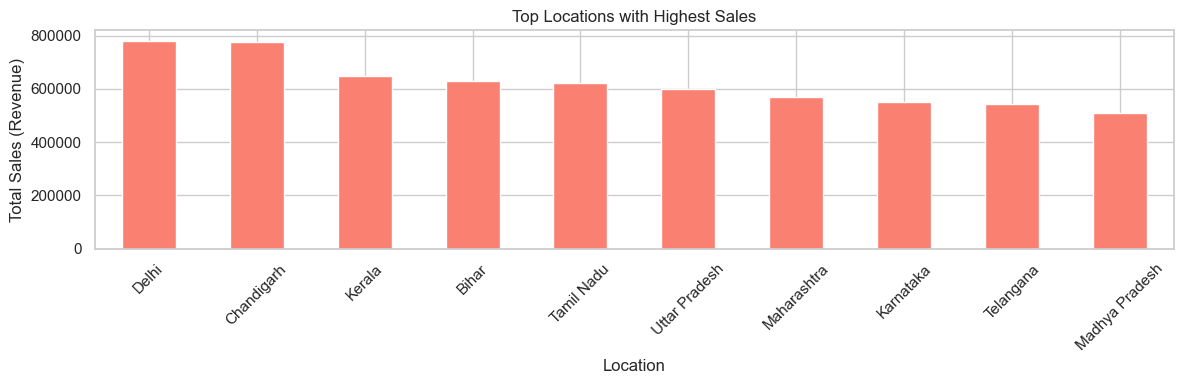

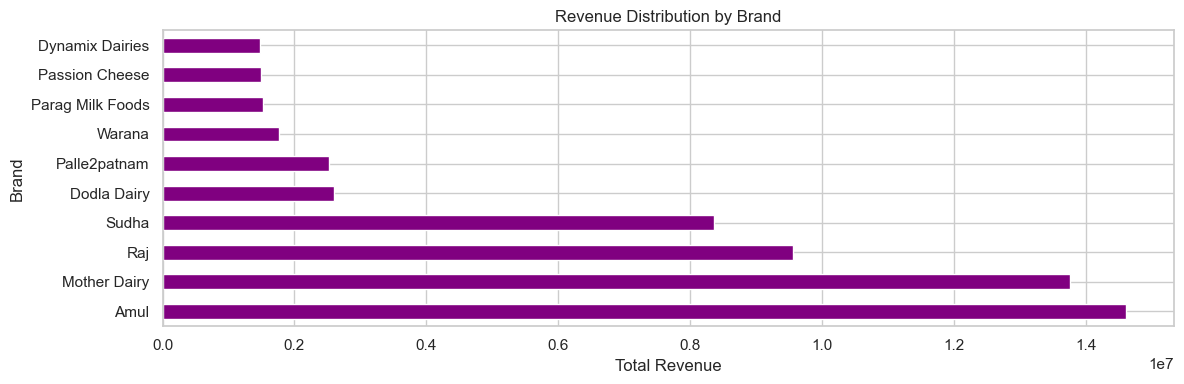

KeyError: 'Product_Name'

<Figure size 1200x600 with 0 Axes>

In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to execute a query and return a pandas DataFrame
def query_to_df(cursor, query):
    return pd.read_sql_query(query, conn)

# Create a connection to SQLite database
conn = sqlite3.connect('DAIRY_DATABASE.db')

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Visualizations (Only for non-empty data)

# 1. Visualize Yearly Product Sales (if data is available)
df_year_product_sales = multi_Q_DAIRY_dataframes[0]
if df_year_product_sales is not None and not df_year_product_sales.empty:
    plt.figure(figsize=(12, 4))
    year_product_sales = df_year_product_sales.groupby('Year_Sales')['Sales'].sum()
    year_product_sales.plot(kind='bar', color='lightblue')
    plt.title("Yearly Product Sales")
    plt.xlabel("Year")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Year_Product_Sales due to empty data.\n")

# 2. Visualize Yearly Brand Sales (if data is available)
df_year_brand_sales = multi_Q_DAIRY_dataframes[1]
if df_year_brand_sales is not None and not df_year_brand_sales.empty:
    plt.figure(figsize=(12, 6))
    year_brand_sales = df_year_brand_sales.groupby('Year_Sales')['Sales'].sum()
    year_brand_sales.plot(kind='bar', color='lightgreen')
    plt.title("Yearly Brand Sales")
    plt.xlabel("Year")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Year_Brand_Sales due to empty data.\n")

# 3. Sales Channel Distribution by Location (if data is available)
df_sales_channel_state_sales = multi_Q_DAIRY_dataframes[2]
if df_sales_channel_state_sales is not None and not df_sales_channel_state_sales.empty:
    plt.figure(figsize=(12, 6))
    sales_channel_state_sales = df_sales_channel_state_sales.groupby('Sales_Channel')['Sales'].sum()
    sales_channel_state_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title("Sales Channel Distribution by Location")
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for SalesChannel_State_Sales due to empty data.\n")

# 4. Product Sales by State (Location) (if data is available)
df_product_state_sales = multi_Q_DAIRY_dataframes[3]
if df_product_state_sales is not None and not df_product_state_sales.empty:
    plt.figure(figsize=(12, 6))
    product_state_sales = df_product_state_sales.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False)
    product_state_sales.plot(kind='bar', color='salmon')
    plt.title("Product Sales by State")
    plt.xlabel("Product")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Product_State_Sales due to empty data.\n")

# 5. Yearly Sales by Location (if data is available)
df_year_state_sales = multi_Q_DAIRY_dataframes[4]
if df_year_state_sales is not None and not df_year_state_sales.empty:
    plt.figure(figsize=(12, 6))
    year_state_sales = df_year_state_sales.groupby('Year_Sales')['Sales'].sum()
    year_state_sales.plot(kind='line', marker='o', color='blue')
    plt.title("Yearly Sales by Location")
    plt.xlabel("Year")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Year_State_Sales due to empty data.\n")

# 6. Brand and Product Sales Overview (if data is available)
df_brand_product_sales = multi_Q_DAIRY_dataframes[5]
if df_brand_product_sales is not None and not df_brand_product_sales.empty:
    plt.figure(figsize=(12, 6))
    brand_product_sales = df_brand_product_sales.groupby('Brand')['Sales'].sum().sort_values(ascending=False)
    brand_product_sales.plot(kind='bar', color='purple')
    plt.title("Brand and Product Sales Overview")
    plt.xlabel("Brand")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Brand_Product_Sales due to empty data.\n")

# 7. Product Sales Percentage (if data is available)
df_product_sales_percent = multi_Q_DAIRY_dataframes[6]
if df_product_sales_percent is not None and not df_product_sales_percent.empty:
    plt.figure(figsize=(12, 6))
    product_sales_percent = df_product_sales_percent.set_index('Product_Name')['Sales_Percent']
    product_sales_percent.plot(kind='bar', color='skyblue')
    plt.title("Product Sales Percentage")
    plt.xlabel("Product")
    plt.ylabel("Sales Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Product Sales Percentage due to empty data.\n")

# 8. Brand Sales Percentage (if data is available)
df_brand_sales_percent = multi_Q_DAIRY_dataframes[7]
if df_brand_sales_percent is not None and not df_brand_sales_percent.empty:
    plt.figure(figsize=(12, 4))
    brand_sales_percent = df_brand_sales_percent.set_index('Brand')['Sales_Percent']
    brand_sales_percent.plot(kind='bar', color='lightgreen')
    plt.title("Brand Sales Percentage")
    plt.xlabel("Brand")
    plt.ylabel("Sales Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Brand Sales Percentage due to empty data.\n")

# 9. Yearly Sales Percentage (if data is available)
df_year_sales_percent = multi_Q_DAIRY_dataframes[8]
if df_year_sales_percent is not None and not df_year_sales_percent.empty:
    plt.figure(figsize=(12, 4))
    year_sales_percent = df_year_sales_percent.set_index('Year_')['Sales_Percent']
    year_sales_percent.plot(kind='bar', color='purple')
    plt.title("Yearly Sales Percentage")
    plt.xlabel("Year")
    plt.ylabel("Sales Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Year Sales Percentage due to empty data.\n")

# 10. Top Products by Sales in Each Location (if data is available)
df_top_products_location = multi_Q_DAIRY_dataframes[9]
if df_top_products_location is not None and not df_top_products_location.empty:
    plt.figure(figsize=(12, 4))
    top_products_location = df_top_products_location.groupby('Customer_Location')['Sales'].sum().sort_values(ascending=False)
    top_products_location.plot(kind='bar', color='orange')
    plt.title("Top Products by Sales in Each Location")
    plt.xlabel("Customer Location")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Top Products by Sales in Each Location due to empty data.\n")

# 11. Visualize Sales Trends Over Time (Year vs Revenue) 
df_yearly_sales = multi_Q_DAIRY_dataframes[4]  # Assuming Year_State_Sales data
if df_yearly_sales is not None and not df_yearly_sales.empty:
    plt.figure(figsize=(12, 4))
    df_yearly_sales_grouped = df_yearly_sales.groupby('Year_Sales')['Sales'].sum()
    df_yearly_sales_grouped.plot(kind='line', marker='o', color='blue')
    plt.title("Sales Trends Over Time (Year vs Revenue)")
    plt.xlabel("Year")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Yearly Sales Trends due to empty data.\n")

# 12. Compare Sales by Sales Channel 
df_sales_channel = multi_Q_DAIRY_dataframes[2]  # Assuming SalesChannel_State_Sales data
if df_sales_channel is not None and not df_sales_channel.empty:
    plt.figure(figsize=(12, 4))
    sales_by_channel = df_sales_channel.groupby('Sales_Channel')['Sales'].sum().sort_values(ascending=False)
    sales_by_channel.plot(kind='bar', color='lightblue')
    plt.title("Sales by Sales Channel")
    plt.xlabel("Sales Channel")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Sales by Sales Channel due to empty data.\n")

# 13. Top Locations with Highest Sales
df_sales_by_location = multi_Q_DAIRY_dataframes[9]  # Assuming sales by location (Customer_Location)
if df_sales_by_location is not None and not df_sales_by_location.empty:
    plt.figure(figsize=(12, 4))
    sales_by_location = df_sales_by_location.groupby('Customer_Location')['Sales'].sum().sort_values(ascending=False).head(10)
    sales_by_location.plot(kind='bar', color='salmon')
    plt.title("Top Locations with Highest Sales")
    plt.xlabel("Location")
    plt.ylabel("Total Sales (Revenue)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Top Locations with Highest Sales due to empty data.\n")

# 14. Revenue Distribution by Product or Brand
df_brand_product_sales = multi_Q_DAIRY_dataframes[5]  # Assuming Brand_Product_Sales data
if df_brand_product_sales is not None and not df_brand_product_sales.empty:
    plt.figure(figsize=(12, 4))
    revenue_by_brand = df_brand_product_sales.groupby('Brand')['Sales'].sum().sort_values(ascending=False).head(10)
    revenue_by_brand.plot(kind='barh', color='purple')
    plt.title("Revenue Distribution by Brand")
    plt.xlabel("Total Revenue")
    plt.ylabel("Brand")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Revenue Distribution by Brand due to empty data.\n")

# 16. Distribution of Sales by Product
df_product_sales = multi_Q_DAIRY_dataframes[12]  # Assuming Product_Name vs Revenue data
if df_product_sales is not None and not df_product_sales.empty:
    plt.figure(figsize=(12, 6))
    sales_by_product = df_product_sales.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
    sales_by_product.plot(kind='barh', color='lightgreen')
    plt.title("Top Products by Sales")
    plt.xlabel("Total Revenue")
    plt.ylabel("Product Name")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping visualization for Top Products by Sales due to empty data.\n")

# Close the database connection
conn.close()


# Close the connection to the database
conn.close()
